In [32]:
# Import necessary libraries
from pathlib import Path 
import pandas as pd 
import polars as pl
import tarfile 
import urllib.request
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from scipy import stats
import numpy as np

In [19]:
# URL
url = "https://github.com/ageron/data/raw/main/housing.tgz"

In [20]:
# Function to load housing data
def load_housing_data(engine = 'pd'):
    datasets_dir = Path("datasets")
    tarball_path = datasets_dir / "housing.tgz"
    csv_path = datasets_dir / "housing" / "housing.csv"

    if not tarball_path.exists():
        datasets_dir.mkdir(parents=True, exist_ok=True)
        
        urllib.request.urlretrieve(url, tarball_path)

        with tarfile.open(tarball_path) as tar:
            tar.extractall(path=datasets_dir, filter="data")

    if engine == 'pl':
        return pl.read_csv(csv_path)
    elif engine == 'pd':
        return pd.read_csv(csv_path)
    else:
        raise ValueError("Invalid engine. Use 'pl' for Polars or 'pd' for Pandas.")

In [21]:
housing_pd = load_housing_data()
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
housing_pl = load_housing_data('pl')
housing_pl.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""


# Method .head()

## Pandas

In [23]:
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Polars

In [24]:
housing_pl.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""


## .info Method in Pandas

In [25]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Metodo .glimpse and null_count en Polars

In [26]:
housing_pl.glimpse()

Rows: 20640
Columns: 10
$ longitude          <f64> -122.23, -122.22, -122.24, -122.25, -122.25, -122.25, -122.25, -122.25, -122.26, -122.25
$ latitude           <f64> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37.84, 37.84, 37.84
$ housing_median_age <f64> 41.0, 21.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 42.0, 52.0
$ total_rooms        <f64> 880.0, 7099.0, 1467.0, 1274.0, 1627.0, 919.0, 2535.0, 3104.0, 2555.0, 3549.0
$ total_bedrooms     <f64> 129.0, 1106.0, 190.0, 235.0, 280.0, 213.0, 489.0, 687.0, 665.0, 707.0
$ population         <f64> 322.0, 2401.0, 496.0, 558.0, 565.0, 413.0, 1094.0, 1157.0, 1206.0, 1551.0
$ households         <f64> 126.0, 1138.0, 177.0, 219.0, 259.0, 193.0, 514.0, 647.0, 595.0, 714.0
$ median_income      <f64> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912
$ median_house_value <f64> 452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 269700.0, 299200.0, 241400.0, 226700.0, 261100.0
$ ocean_proximity    <str> 'NEAR BAY', 'NEAR BAY'

In [27]:
housing_pl.null_count()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,207,0,0,0,0,0


## Pandas 

In [28]:
# Check the distribution of the "ocean_proximity" column
housing_pd["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [29]:
# Describe the dataset
housing_pd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Histogram

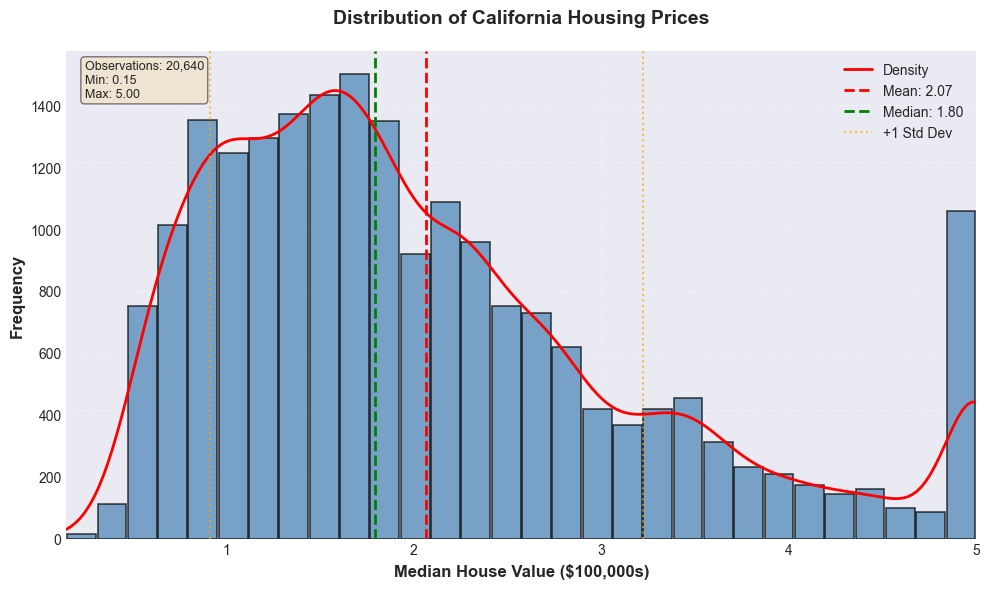

In [17]:
# Load California housing dataset as a pandas DataFrame
housing = fetch_california_housing(as_frame=True)
housing_pd = housing.frame

# The target variable is MedHouseVal (median house value in $100,000s)
prices = housing_pd["MedHouseVal"]

# Set style for a more professional look
plt.style.use('seaborn-v0_8-darkgrid')  # Modern style

# Create figure with better size
fig, ax = plt.subplots(figsize=(10, 6))

# Create enhanced histogram
n, bins, patches = ax.hist(prices, 
                        bins=30, 
                        edgecolor='black',  # Black borders
                        linewidth=1.2,
                        alpha=0.7,  # Transparency
                        color='steelblue',  # More pleasant color
                        rwidth=0.95)  # Gap between bars

# Add density line (approximate KDE)
density = stats.gaussian_kde(prices)
x_range = np.linspace(prices.min(), prices.max(), 200)
ax.plot(x_range, density(x_range) * len(prices) * (bins[1]-bins[0]), 
        'r-', linewidth=2, label='Density')

# Customize axes with better formatting
ax.set_xlabel("Median House Value ($100,000s)", 
                fontsize=12, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=12, fontweight='bold')
ax.set_title("Distribution of California Housing Prices", 
                fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Add descriptive statistics
mean_price = prices.mean()
median_price = prices.median()
std_price = prices.std()

ax.axvline(mean_price, color='red', linestyle='--', 
        linewidth=2, label=f'Mean: {mean_price:.2f}')
ax.axvline(median_price, color='green', linestyle='--', 
        linewidth=2, label=f'Median: {median_price:.2f}')
ax.axvline(mean_price + std_price, color='orange', linestyle=':', 
        linewidth=1.5, alpha=0.7, label=f'+1 Std Dev')
ax.axvline(mean_price - std_price, color='orange', linestyle=':', 
        linewidth=1.5, alpha=0.7)

# Add legend
ax.legend(loc='upper right', fontsize=10, framealpha=0.9)

# Add text box with additional information
stats_text = f'Observations: {len(prices):,}\nMin: {prices.min():.2f}\nMax: {prices.max():.2f}'
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Improve axis formatting
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(prices.min(), prices.max())

# Adjust layout to prevent cutting off
plt.tight_layout()

# Show plot
plt.show()

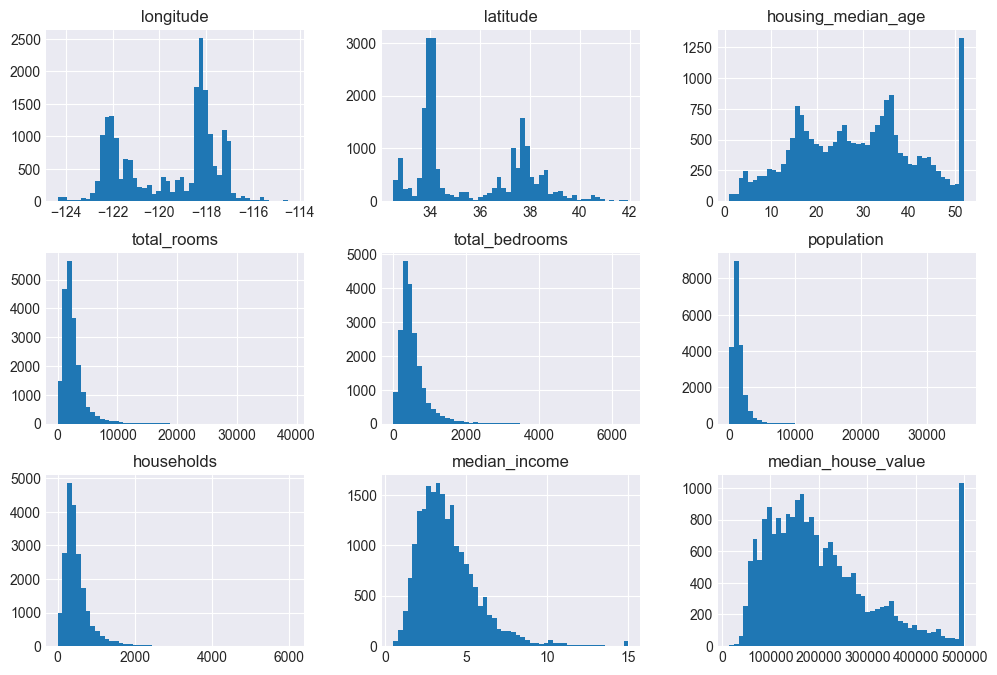

In [30]:
housing_pd.hist(bins=50, figsize=(12, 8))
plt.show()

# Random mix

In [ ]:
def shuffle_and_split_data(data, test_ratio, rng):
    # Generates a random permutation
    # rng is a random number generator (for eg, np.random.default_rng(seed))
    shuffled_indices = rng.permutation(len(data)) # [4, 2, 3, 1]

    # Calculate how many rows will go to the test set
    test_set_size = int(len(data) * test_ratio) # 1000 * 0.2 = 200

    # Take the first (already mixed) indices for the test set
    indexes_test = shuffled_indices[:test_set_size] # 0 : 200 = %20

    # The remaining indices will be for the train set
    train_indexes = shuffled_indices[test_set_size:] # 200 : 1000 = %80

    # Returns two subsets using iloc (positional indexing)
    # First the train, then the test
    return data.iloc[train_indexes], data.iloc[indexes_test]

In [33]:
# Generate a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(seed=42)

In [34]:
train_set , test_set = shuffle_and_split_data(housing_pd, 0.2, rng)

In [35]:
len(train_set), len(test_set)

(16512, 4128)

In [36]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18731,-117.07,32.80,36.0,2028.0,349.0,820.0,352.0,3.9828,168900.0,<1H OCEAN
3002,-122.45,37.71,50.0,1441.0,283.0,1159.0,286.0,4.5417,233700.0,NEAR OCEAN
19844,-118.33,33.82,26.0,5591.0,934.0,2824.0,939.0,6.5861,417800.0,<1H OCEAN
4939,-122.20,37.43,38.0,3626.0,528.0,1350.0,532.0,7.3681,500001.0,NEAR OCEAN
1674,-121.47,38.54,47.0,2085.0,464.0,1346.0,402.0,1.2679,56700.0,INLAND


# Split by hash of the identifier

In [38]:
# Import necessary libraries
from zlib import crc32
import numpy as np

In [39]:
def is_id_in_test_set(id, radio_test):
    return crc32(np.int64(id)) < radio_test * 2 **32

# `crc32(...)`
Produces an integer in the range:
$[0, 2^{32} - 1 ] = [0, 4.294.967.295]$

In [40]:
crc32(np.int64(1))

2844319735

In [41]:
crc32(np.int64(2))

654825492

In [42]:
crc32(np.int64(3))

3954038922

# Sckit Learn 

In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_pd, test_size=0.2, random_state=42)

In [44]:
len(train_set), len(test_set)

(16512, 4128)